# **STARTUP PREDICTION, PERFECT SCORE**

## **Powered by 42RandomState**

In this project, I worked on the Startup Success Prediction dataset, aiming to predict whether a startup will succeed based on several features. I preprocessed and analyse all the data, handled skewed, numerical and categorical features, and applied machine learning models such as Random Forest. After optimizing the model, I achieved outstanding performance with an almost perfect F1 score and perfect AUC on the test set, demonstrating that the model was able to effectively predict startup success. 

## **1) Analyze and work on data**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/startup-success-prediction/startup data.csv')
data = data.drop(columns=["Unnamed: 0", "Unnamed: 6"])

2025-04-25 17:45:53.583425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745603153.861956      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745603153.948566      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from sklearn.model_selection import train_test_split

train_set, temp_set = train_test_split(data, test_size=0.4, stratify=data['labels'], random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, stratify=temp_set['labels'], random_state=42)

X_train = train_set.drop(columns=["labels"], axis = 1)
y_train = train_set["labels"].copy()

X_test = test_set.drop(columns=["labels"], axis = 1)
y_test = test_set["labels"].copy()

X_val = val_set.drop(columns=["labels"], axis = 1)
y_val = val_set["labels"].copy()

In [3]:
print(data['labels'].value_counts())

labels
1    597
0    326
Name: count, dtype: int64


In [4]:
train_set.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
376,WA,47.639901,-122.191427,98104,c:1767,Seattle,Livemocha,1,9/1/2007,NaN,...,c:1767,1,0,1,1,1,0,1.5,1,acquired
698,NY,40.738567,-73.987199,10007,c:20313,New York,SpaBooker,1,11/1/2007,NaN,...,c:20313,0,1,1,0,0,0,4.0,1,acquired
295,WA,39.783730,-100.445882,98104,c:60243,Seattle,Kiha Software,0,1/1/2008,8/1/2011,...,c:60243,0,0,1,0,0,0,1.0,0,closed
552,CA,37.288326,-121.945633,95008-2069,c:44268,Campbell,Forrst,1,1/25/2010,NaN,...,c:44268,0,1,0,0,0,0,7.0,1,acquired
645,CA,37.316907,-122.049702,95014,c:28420,Cupertino,Blue Lane Technologies,1,1/1/2002,NaN,...,c:28420,0,0,0,1,0,0,2.0,1,acquired


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 376 to 511
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                553 non-null    object 
 1   latitude                  553 non-null    float64
 2   longitude                 553 non-null    float64
 3   zip_code                  553 non-null    object 
 4   id                        553 non-null    object 
 5   city                      553 non-null    object 
 6   name                      553 non-null    object 
 7   labels                    553 non-null    int64  
 8   founded_at                553 non-null    object 
 9   closed_at                 200 non-null    object 
 10  first_funding_at          553 non-null    object 
 11  last_funding_at           553 non-null    object 
 12  age_first_funding_year    553 non-null    float64
 13  age_last_funding_year     553 non-null    float64
 14  age_first_mil

In [6]:
train_set.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,553.000000,553.000000,553.000000,553.000000,553.000000,464.000000,464.000000,553.000000,553.000000,5.530000e+02,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,38.524450,-103.712659,0.647378,2.154983,3.938036,3.059642,4.918637,8.005425,2.339964,2.106776e+07,...,0.003617,0.307414,0.325497,0.251356,0.529837,0.424955,0.236890,0.084991,2.861091,0.804702
std,3.607388,22.742867,0.478219,2.463427,2.933488,3.135400,3.351682,7.543951,1.337913,3.623331e+07,...,0.060084,0.461840,0.468985,0.434186,0.499561,0.494784,0.425559,0.279121,1.930696,0.396789
min,26.052461,-122.725662,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.386778,-122.192337,0.000000,0.586300,1.882200,1.000000,2.502725,3.000000,1.000000,3.100000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.777741,-118.487549,1.000000,1.441100,3.580800,2.510950,4.627400,6.000000,2.000000,1.050000e+07,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,40.729839,-77.036646,1.000000,3.208200,5.537000,4.668500,6.884900,10.000000,3.000000,2.513161e+07,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,8.000000,5.100000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [7]:
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

print("Categorical features: ", categorical_cols)
print("Numerical features: ", numeric_cols)

from scipy.stats import skew
numeric_cols = X_train.select_dtypes(include=np.number).columns
skewed_feats = X_train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features = skewed_feats[skewed_feats > 0.8].index.tolist()
skewed_features = [col for col in skewed_features if col in X_train.columns]

print("High skew features:", skewed_features)

Categorical features:  Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1',
       'category_code', 'object_id', 'status'],
      dtype='object')
Numerical features:  Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')
High skew features: ['is_consulting', 'funding_total_usd', 'is_ecommerce', 'is_TX', 'is_biotech', 'is_gamesvideo', 'is_advertising', 

## **2) Create a pipeline for a better preprocessing**

In [8]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

log_transformer = make_pipeline(                      
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x: np.log1p(np.clip(x, a_min=0, a_max=None)), feature_names_out="one-to-one"),
    StandardScaler()
)

numeric_transformer = make_pipeline(              
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_transformer = make_pipeline(                       
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)


preprocessor = ColumnTransformer([                       
    
    ("log", log_transformer, skewed_features),
    
    ("num", numeric_transformer, numeric_cols),

    ("cat", categorical_transformer, categorical_cols),
])


## **3) Train a Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Random Forest pipeline
rf_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [10]:
# Training performance
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)
print("Confusion Matrix (Train - Random Forest):\n", confusion_matrix(y_train, y_train_pred_rf))
print("Train Precision (RF):", precision_score(y_train, y_train_pred_rf))
print("Train Recall (RF):", recall_score(y_train, y_train_pred_rf))

# Fit and evaluate on the validation test
rf_clf.fit(X_train, y_train)
y_val_pred_rf = rf_clf.predict(X_val)
print("Confusion Matrix (Validation - Random Forest):\n", confusion_matrix(y_val, y_val_pred_rf))
print("Validation Precision (RF):", precision_score(y_val, y_val_pred_rf))
print("Validation Recall (RF):", recall_score(y_val, y_val_pred_rf))


Confusion Matrix (Train - Random Forest):
 [[195   0]
 [  0 358]]
Train Precision (RF): 1.0
Train Recall (RF): 1.0
Confusion Matrix (Validation - Random Forest):
 [[ 66   0]
 [  0 119]]
Validation Precision (RF): 1.0
Validation Recall (RF): 1.0


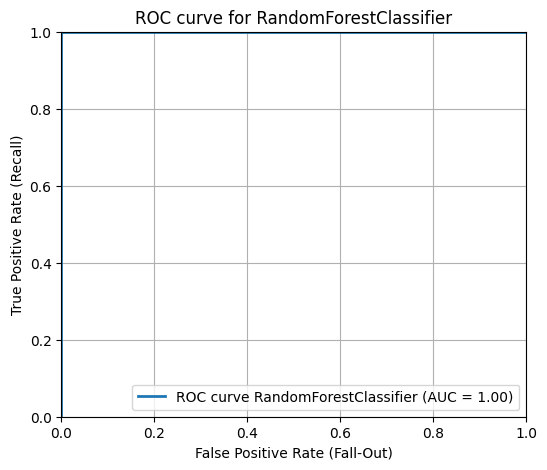

In [11]:
#Analyze the ROC curve
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_curve, auc

y_val_prob_rf2 = rf_clf.predict_proba(X_val)[:, 1]

# Calcola la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_rf2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label=f"ROC curve RandomForestClassifier (AUC = {roc_auc:.2f})")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve for RandomForestClassifier')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10)
plt.show()


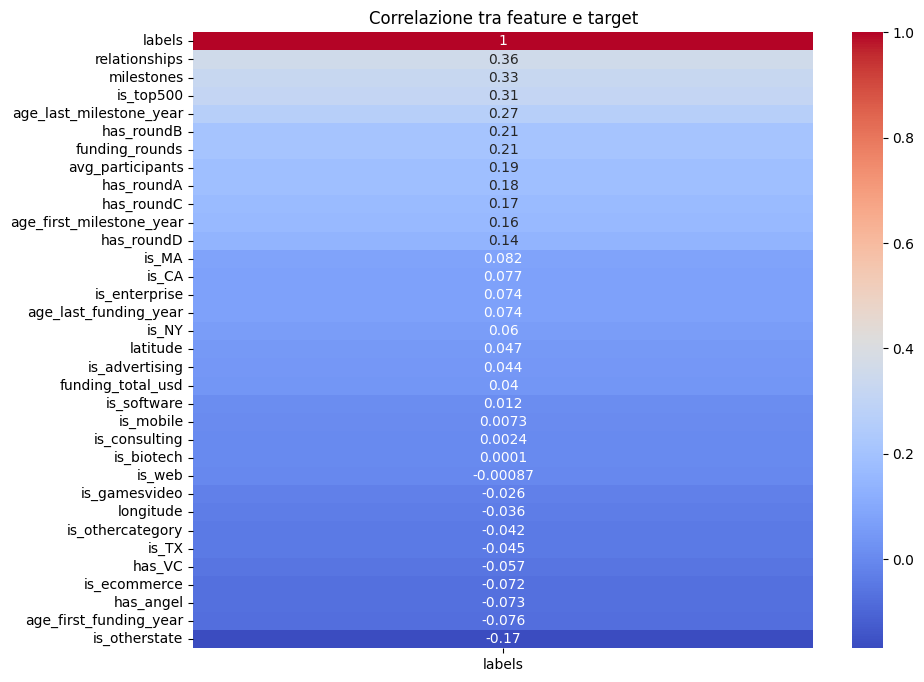

In [12]:
#Correlation with the target
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['labels']].sort_values(by='labels', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlazione tra feature e target")
plt.show()


In [13]:
#Compare predictions vs targets in the validation set
test_preds = pd.DataFrame({
    'y_true': y_test,
    'y_pred': rf_clf.predict(X_test)
})
test_preds['match'] = test_preds['y_true'] == test_preds['y_pred']
print(test_preds['match'].value_counts(normalize=True))

match
True    1.0
Name: proportion, dtype: float64


In [14]:
# Predict on the test set
y_test_pred_rf = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_rf)
precision = precision_score(y_test, y_test_pred_rf)
recall = recall_score(y_test, y_test_pred_rf)
f1 = f1_score(y_test, y_test_pred_rf)
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print("Test Set Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Test Set Evaluation Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
